<a href="https://colab.research.google.com/github/ArtyomIT/Parkinsons-detection/blob/main/Detecting_Parkinson's_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Data processing and analysis

In [3]:
df=pd.read_csv("parkinsons.data")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df.shape

(195, 24)

In [9]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [10]:
df.describe().round(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.00,195.00,195.00,195.00,195.0,195.00,195.00,195.00,195.00,195.00,...,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00,195.00
mean,154.23,197.10,116.32,0.01,0.0,0.00,0.00,0.01,0.03,0.28,...,0.05,0.02,21.89,0.75,0.50,0.72,-5.68,0.23,2.38,0.21
std,41.39,91.49,43.52,0.00,0.0,0.00,0.00,0.01,0.02,0.19,...,0.03,0.04,4.43,0.43,0.10,0.06,1.09,0.08,0.38,0.09
min,88.33,102.14,65.48,0.00,0.0,0.00,0.00,0.00,0.01,0.08,...,0.01,0.00,8.44,0.00,0.26,0.57,-7.96,0.01,1.42,0.04
25%,117.57,134.86,84.29,0.00,0.0,0.00,0.00,0.00,0.02,0.15,...,0.02,0.01,19.20,1.00,0.42,0.67,-6.45,0.17,2.10,0.14
50%,148.79,175.83,104.32,0.00,0.0,0.00,0.00,0.01,0.02,0.22,...,0.04,0.01,22.08,1.00,0.50,0.72,-5.72,0.22,2.36,0.19
75%,182.77,224.21,140.02,0.01,0.0,0.00,0.00,0.01,0.04,0.35,...,0.06,0.03,25.08,1.00,0.59,0.76,-5.05,0.28,2.64,0.25
max,260.10,592.03,239.17,0.03,0.0,0.02,0.02,0.06,0.12,1.30,...,0.17,0.31,33.05,1.00,0.69,0.83,-2.43,0.45,3.67,0.53


In [11]:
X=df.loc[:,df.columns!='status'].values[:,1:]
y=df.loc[:,'status'].values

In [12]:
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)

### Model creation and training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.185, random_state = 42)

In [16]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
pred=model.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 97.30%


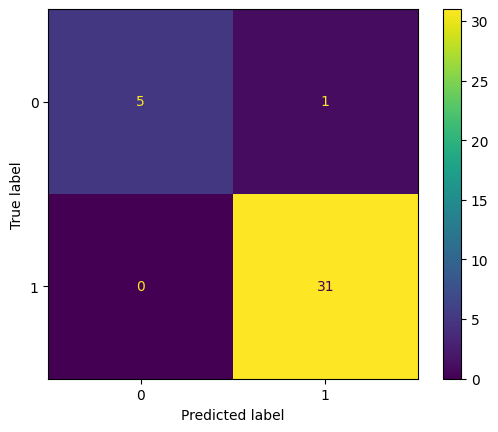

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)